# Applications

Here, I am working up a few probabilistic applications of the ideas for the paper on the Age Area Hypothesis. 

In [1]:
import copy
import os
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import random

plt.rcParams["figure.figsize"] = (12,8)

if os.path.exists('C:\\Users\\matth\\'):
    os.environ['PROJ_LIB'] = 'C:\\Users\\matth\\Anaconda3\\pkgs\\basemap-1.2.1-py37h79c95a4_1\\Library\\share\\basemap'

from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from adjustText import adjust_text

start_dir = os.getcwd()
python_dir = pathlib.Path(os.getcwd()).parts[:-1] + ('Python',)
os.chdir(pathlib.Path(*python_dir))

from PyInstEvo import *

os.chdir(start_dir)
os.chdir('..')

pd.set_option('display.width', 1000)
np.set_printoptions(linewidth=120)

%matplotlib inline

In [2]:
Data = pd.read_pickle(os.getcwd() + '//IEData//MasterData.pkl')
Splits = pd.read_pickle(os.getcwd() + '//IEData//Splits.pkl')
Depths = pd.read_pickle(os.getcwd() + '//IEData//Depths.pkl')

We can declare a class using the "ResolvedTree" class. Here it is:

# One Example

Initiation of a tree using the old method. Traditionally, we have instituted the whole procedure from a data frame as follows, so one idea might be to work with that. So, we can do:

In [3]:
UY = PhyloTree(Data.loc[Data['ruhlen_1'] == 'URALICYUK'], 'test')

In [4]:
UralicYukRT = ResolvedTree(Data.loc[Data['ruhlen_1'] == 'URALICYUK'], 'UYTree1')  #Create a resolved tree
numbranches = UralicYukRT.interiorbranches                                        #Get no. of interior branches
bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)      #Make a conformable set of parameters
rInit       = np.zeros((1, len(UralicYukRT.words)))                                            #initial rate parameters
dparms      = np.sum(UralicYukRT.deathmat[:,0] == 0)                                           #Number of death parameters needed
dInit       = np.zeros((1, dparms)) + 1                                                      #Values for death parameters
eInit       = np.matrix(5)                                                                   #Overall depth parameter
parmsInit   = np.hstack((bInit, rInit, dInit, eInit)) 

Initiating from Data Frame...


So, we see that a resolved tree has a few more things in it than a simple tree, most of which pertains to the way in which the tree was randomly resolved. 

To use the methods, we need a bunch of things first.

In [5]:
def DFill():
    words = ['word1', 'word2', 'word3', 'word11', 'word12', 'word18', 'word19',
           'word21', 'word22', 'word23', 'word25', 'word28', 'word30', 
           'word31', 'word34', 'word39', 'word40', 'word41', 'word43', 
           'word44', 'word47', 'word48', 'word51', 'word53', 'word54', 
           'word57', 'word58', 'word61', 'word66', 'word72', 'word74',
           'word75', 'word77', 'word82', 'word85', 'word86', 'word92', 
           'word95', 'word96', 'word100']
        
    namelist = [ 'TR' + str(x) for x in range(1, 17) ]  

    dim1 = len(words)
    DogList = ['p', 't', 's', 'c', 'm', 'N', 'l', 'w', 'y', 'i']

    # Creates a list of all the names of states variables. 
    
    statenames=[]
    for i in range(0, dim1):
        for j in range(0, 10):
            statenames.append(words[i] + str(i) + '_' + DogList[j])    

    A={}
    for a in namelist + statenames + ['name', 'lat', 'lon', 'deadOne', 'ex_date', 'ex_date_sd']:
        A[a] = [0]

    DF = pd.DataFrame(A)    
    return(DF)

Now, we can make a base tree with really no attributes and we can fill in various things as we go. So:

In [6]:
SemiticTree = PhyloTree(DFill(), 'Test')

We will try and fill in a tree with the basic details of the following Tree, as estimated in the paper. Note that we should be able to calibrate the branches to have roughly the standard errors in the Tree...

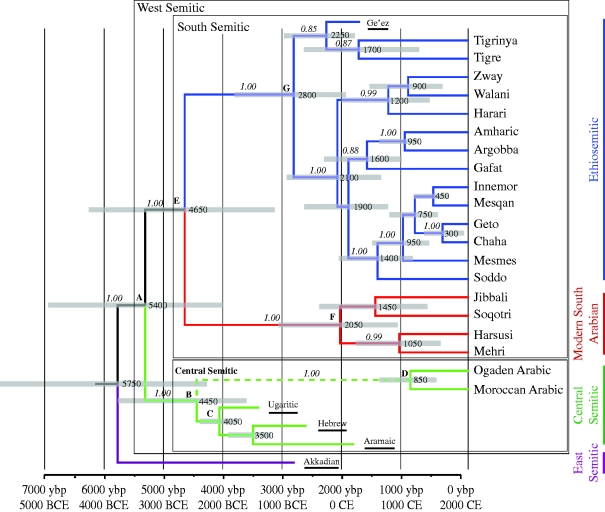

In [7]:
file = os.getcwd() + '\\SavedFigures\\rspb20090408fig2.jpg'
Image(filename = file)

In [8]:
names = ['Ge`ez', 'Tigrinya', 'Tigre', 'Zway', 'Walani', 'Harari', 'Amharic', 'Argobba', 'Gafat',
         'Innemor', 'Mesqan', 'Geto', 'Chaha', 'Mesmes', 'Soddo', 'Jibbali', 'Soqotri',
         'Harsusi', 'Mehri', 'Ogaden Arabic', 'Moroccan Arabic', 'Ugaritic', 'Hebrew', 'Aramaic', 'Akkadian']

names_to_add = []
for name in names:
    names_to_add.append([name])

Next, we can add in the current day location of each people. We can get these from the Ethnographic Atlas or by just looking them up. Coordinates are longitude, then latitude:

In [9]:
locs = {'Ge`ez': [41., 12.94], 'Tigrinya': [39., 14.], 'Tigre': [39., 17.],
        'Zway': [38.72, 7.93], 'Walani': [36.5, 6.5], 'Harari': [36.4, 9.65],
        'Amharic': [39.2, 12.5], 'Argobba': [38.72, 10.67], 'Gafat': [37, 12.2],
        'Innemor': [36.67, 8.33], 'Mesqan': [38.38, 8.12], 'Geto': [39.2, 8.2], 
        'Chaha': [39.6, 8.9], 'Mesmes': [37.1, 7.5], 'Soddo': [42.85, 6.6],
        'Jibbali': [54.84, 17.27], 'Soqotri': [53.77, 12.55],
        'Harsusi': [55.9, 19.91], 'Mehri':[51.66, 17.06], 
        'Ogaden Arabic':[44.58, 7.39], 'Moroccan Arabic':[-6.93, 32.64],
        'Ugaritic': [35.79, 35.60], 'Hebrew':[34.88, 31.66], 'Aramaic': [40.08, 36.30],
        'Akkadian':[46.5, 32.05] }

lats = []
lons = []
for item in locs:
    lons.append(locs[item][0])
    lats.append(locs[item][1])

In [10]:
SemiticTree.name = np.matrix(names_to_add)

In [11]:
plt.scatter(lons, lats)
mplleaflet.display()

C:\Users\matth\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Which looks about right. In any event, next we have:

In [12]:
SemiticTree.lat = np.array(lats)
SemiticTree.lon = np.array(lons)
SemiticTree.D = gcircledist(SemiticTree.lat, SemiticTree.lon)

Here we fill in the tree matrix and the so called "Death Matrix." Note that all extant language groupings have a 1 as their first entry. (So what is the 10 for?) The DeData is the data on the Death date, I think. 

In [13]:
TMat = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6],
        [0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 9],
        [0, 1, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 9, 9, 10, 11, 12, 13],
        [0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 8, 8, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]

DMat = [[0, .4], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], 
        [1, 10], [1, 10], [1, 10], [1, 10], [1, 10], [0, .1], [0, .1], [0, .1], [0, .1]]

DeData = [[200, 25], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [np.nan, 50], [np.nan, 50], [np.nan, 50],
          [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], [np.nan, 50], 
          [-1200, 25], [-600, 25], [-200, 25], [-800, 25]]

Now, we can add this information to our nascent tree as follows:

In [14]:
SemiticTree.BaseTree = np.matrix(TMat).transpose()
SemiticTree.deathmat = np.matrix(DMat)
SemiticTree.deathdata = np.matrix(DeData)
SemiticTree.states = np.matrix(np.zeros((25, 400)))

This should be enough to declare everything as we see fit...

In [15]:
STR = ResolvedTree(SemiticTree, 'Semitic Tree')

Initiating from basic tree with user-provide matrices.


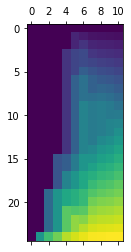

In [16]:
STR.matplot()

In [17]:
numbranches = STR.interiorbranches                                        
bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
rInit       = np.zeros((1, len(STR.words)))                         
dparms      = np.sum(STR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) + 1                                     
eInit       = np.matrix(5)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit)) 

In [18]:
bInit = np.ones((1, numbranches))*(-3)

In [19]:
dInit

array([[1., 1., 1., 1., 1.]])

To be clear, in the above, the branch parameters are given in `bInit`, while the `rInit` pertain to the rate changes for words. The dparms are the parameters that do the "back" correction for the matrix, while the eInit parameter is the overall depth of the tree. 

In [20]:
STP = ParameterizedTree(SemiticTree, 'test', parmsInit)

Initiating from basic tree with user-provide matrices.


Inserting time splits derived from the paper before we go any further. We have:

In [21]:
splits = pd.DataFrame([['Semetic', 'Akkadian', 'Aramaic',  5750, 25],
                       ['Semetic', 'Akkadian', 'Tigrinya', 5750, 25],
                       ['Semetic', 'Ge`ez', 'Tigrinya',     2250, 25],
                       ['Semetic', 'Tigrinya', 'Tigre',    1700, 25], 
                       ['Semetic', 'Zway', 'Walani',        900, 25],
                       ['Semetic', 'Harari', 'Walani',     1200, 25],
                       ['Semetic', 'Amharic', 'Argobba',    950, 25],
                       ['Semetic', 'Amharic', 'Gafat',     1600, 25],
                       ['Semetic', 'Innemor', 'Mesqan',     450, 25],
                       ['Semetic', 'Geto', 'Chaha',         300, 25],
                       ['Semetic', 'Tigrinya', 'Chaha',               2800, 25],
                       ['Semetic', 'Jibbali', 'Soqotri',              1450, 25],
                       ['Semetic', 'Mehri', 'Walani',                 4650, 25],
                       ['Semetic', 'Harsusi', 'Mehri',                1050, 25],
                       ['Semetic', 'Ogaden Arabic', 'Moroccan Arabic', 850, 25],
                       ['Semetic', 'Ugaritic', 'Hebrew',              4050, 25],
                       ['Semetic', 'Hebrew', 'Tigrinya',              5400, 25],
                       ['Semetic', 'Hebrew', 'Aramaic',               3500, 25],
                       ['Semetic', 'Moroccan Arabic', 'Aramaic',      4450, 25],
                       ['Semetic', 'Soqotri', 'Harsusi',              2050, 25],
                       ['Semetic', 'Soddo', 'Innemor',                1400, 25],
                       ['Semetic', 'Mesmes', 'Chaha',                  950, 25],
                       ['Semetic', 'Soddo', 'Gafat',                  1900, 25],
                       ['Semetic', 'Soddo', 'Walani',                 2100, 25]])

In [22]:
STP.splitinfo(splits)
STP.priordepth(7.2, 6.2)
STP.settimes()

The following is a parameterized tree that fairly closely approximates the tree in the article... 

-6792.925763950855 -585.3216492840306


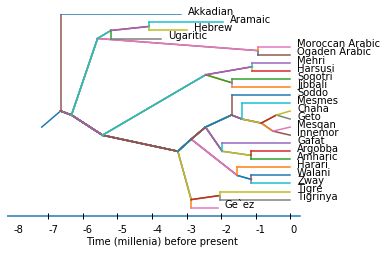

In [23]:
btouse = np.matrix([[-.4, .1, -.399, -.34, -1.54, -1.01, -1.4, -.814, -0.914, -.14, -1.78, -1.3, -2, 
                     -2, -.8, .21, 1.6, -2.6, 
                     -.4, .2, -1.8, -2, -3, -2.5]])
# In reverse order:
# Root 
# Akkadian Split
# Break up of Arabic - the (-2.6) is the breakup of Aramaic, Hebrew and Ugaritic
# (-2) IS THE breakup of the soddo-geez group
# (-1.78 is the breakup of soddo-amharic group)
# -0.914 is the Tigre-Tigrinya split
# -1.01 is the Walani-Zway split
# -2.54 is the mesmes-innemor breakup
# -3.9999 is the Chat Geto Mesqan Innemor breakup

dtouse = np.matrix([[1, .95, 1, -.1, -.10]])

STP.bparms = btouse
STP.dparms = dtouse
STP.settimes()
print(STP.SplitLikelihood(), STP.DeathLikelihood())
STP.showtree()


In [24]:
STP.DeathLikelihood(), STP.SplitLikelihood()

(-585.3216492840306, -6792.925763950855)

It remains to be seen if the above actually is working the way we intended it to. In any event, we shall check that rigorously later. 

# Tuning to match another Tree - Formal Method

Here, we use a simple algorithm to match the tree to another tree that is given in a book or something, with the ultimate aim of using the given tree to choose locations. How do we work between Trees and copies?

So, an MCMC algorithm will propose changes to each parameter, and then compare log likelihoods so as to take the one that matches things best. Anyways, we can modify our MCMC algorithm as follows - I will use a mwg sampler first, as the extension to a global sampler isn't that bad. 

One thing to be careful about - you want initialization to note use old things that might be hanging around!

In [25]:
numbranches = STP.interiorbranches

bInit       = np.matrix(- 1 - np.linspace(0,10,num=numbranches)/numbranches)
rInit       = np.zeros((1, len(STR.words)))                         
dparms      = np.sum(STR.deathmat[:,0] == 0)                        
dInit       = np.zeros((1, dparms)) + 1                                     
eInit       = np.matrix(0)                                                  
parmsInit   = np.hstack((bInit, rInit, dInit, eInit))

In [26]:
Told = ParameterizedTree(SemiticTree, 'mcmc', parmsInit)
Told.splitinfo(splits)
Told.priordepth(5, 6)
Told.settimes()

Initiating from basic tree with user-provide matrices.


In [27]:
draws  = 100
burn   = 20
damper = .5
aopt   = .25

xold = np.hstack((bInit, dInit, eInit))              # Complete vector of parameters
nb    = np.shape(xold)[1]                     # Number of parameters
bdim  = np.shape(bInit)[1]                     # Break point between branch and death parameters

lam   = 2.38**2 / nb*np.ones((1, nb))           # adaptation parameter
 
val = []                                       # holder for likelihood
Accept = np.zeros((1, nb))                     # Acceptances
alpha  = np.zeros((1, nb))                     # alpha probability of acceptance
xs     = []                                    # place older for parameter values
mu     = np.array(xold).flatten()             # mean of proposal distribution (not needed for this routine)

Vinit = np.eye(nb)                             # Initial variance for proposals

old = Told.SplitLikelihood() + Told.DeathLikelihood()
print(old)

-23513.2894857921


In [28]:
Told.SplitLikelihood(), Told.DeathLikelihood()

(-18992.77488082169, -4520.514604970411)

In [29]:
for i in np.arange(draws):
    accept = np.zeros((1, nb))
    
    for j in range(nb):
        Tnew = copy.deepcopy(Told)
        xnew = copy.deepcopy(xold)
        xnew[0, j] = xold[0, j] + multivariate_normal.rvs(0)*np.sqrt(Vinit[j, j])*lam[0, j]
        bParms = xnew[:, 0:bdim]
        dParms = xnew[:, bdim:-1]
        eParms = xnew[:, -1][0, 0]
        
        Tnew.bparms = bParms
        Tnew.dparms = dParms
        Tnew.eparms = eParms
        Tnew.settimes()        
        
        pro    = Tnew.SplitLikelihood() + Tnew.DeathLikelihood()
     
        if np.isnan(xnew[0, j]):
            alpha[0, j] = 0
        elif pro > old:
            alpha[0, j] = 1
        else:
            alpha[0, j] = np.exp(pro - old)
            
        if np.random.uniform(0, 1) < alpha[0, j]:
            old = pro
            xold = xnew[:]
            accept[0, j] = 1
            Told = copy.deepcopy(Tnew)
        
        if np.random.uniform(0, 1) > .999:
            print(i, old)
    
    xs.append(xold)        
    val.append(old)
    lam = lam*np.exp(1/(i + 1)**damper*(alpha - aopt))
    Accept = np.vstack((Accept, accept))

3 -16138.12416858794
5 -13926.228114947557
12 -2189.798286036808
55 -127.28786214625596
62 -121.77984555128288


In [30]:
Told.DeathLikelihood(), Told.SplitLikelihood()

(-5.782054990017704, -62.934353573036404)

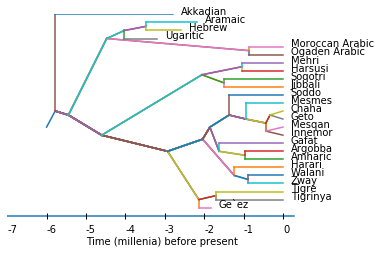

In [31]:
Told.showtree()

In [32]:
def OL2(PT, timescale=1000, distances=True, distancescale=1, usetimes=True):
    
    TM       = PT.resolvedtree 
    bp       = PT.branchpositions      
    bp       = bp[rows(TM):]
    branches = PT.filledtimeFractions*PT.depth*timescale
 
    LL       = np.zeros(rows(TM))
    LL_D     = np.zeros(rows(TM))
    NN       = np.zeros(rows(TM))        
    TT       = branches[:, -1]
    DD       = np.zeros(rows(TM))
    Live     = np.zeros(rows(TM))
        
    D         = np.copy(PT.D) / distancescale
    np.fill_diagonal(D, 1)
    
    lnD = - np.log(D)
    
    if distances == False:
        lnD       = np.zeros(np.shape(lnD))
        
    afac = 1
    
    if usetimes == False:
        afac = 0
    
    for bb in bp:
        r, c    = bb[0], bb[1]
        id      = TM[r, c]
        tu      = np.where(TM[:, c] == id)[0]
        bhat    = branches[tu, c]
        THat    = TM[tu, c:]
        NNCount = NN[tu] + 1
        TTCount = TT[tu] + bhat
        LLHat   = LL[tu]

        for p in tu:
            if Live[p] == 1:
                LL[p]   = LL[p] + NN[p] * (np.log(NN[p]) - np.log(TT[p]))
                LL_D[p] = LL_D[p] + DD[p]
    
        LL_DHat = LL_D[tu]

        DHat    = (lnD[tu, :])[:, tu]
     
        z = 0
        while True:
            ids  = uniq(THat[:, z])
            nums = THat[:, z]
            z    = z + 1
            if len(ids) > 1:
                break
         
        TTHat = np.zeros(len(nums))
        NNHat = np.zeros(len(nums))
        DDHat = np.zeros(len(nums))
     
        for m in ids:
            posi   = np.where(nums == m)[0]
            posni  = np.where(nums != m)[0]
            toAdd  = TTCount[posni]
            for q in posi:
                maxFinder = NNCount[posni]*(np.log(NNCount[posni]) \
                    - np.log(toAdd)) + LL_DHat[posni] + DHat[q, posni] + LLHat[posni]
                maxm      = np.argmax(maxFinder)
                TTHat[q]  = toAdd[maxm]
                NNHat[q]  = NNCount[posni[maxm]]
                DDHat[q]  = DHat[q, posni[maxm]] + LL_DHat[posni[maxm]]
     
        for p in range(0, rows(tu)):
            TT[tu[p]] = TTHat[p]
            NN[tu[p]] = NNHat[p]
            DD[tu[p]] = DDHat[p]
            if Live[tu[p]] == 0:
                Live[tu[p]] = 1
    
    for p in tu:
        if Live[p] == 1:
            LL[p]   = LL[p] + NN[p] * (np.log(NN[p]) - afac*np.log(TT[p]))
            LL_D[p] = LL_D[p] + DD[p]    
        
    return LL_D + LL

In [33]:
vals = OL2(Told, timescale=1, distances=False, distancescale=1000, usetimes=True)

In [34]:
probs = np.exp(vals)/np.sum(np.exp(vals))

In [35]:
for i in range(len(probs)):
    print(Told.name[i][0][0], np.round(probs[i], 4), vals[i])

[['Ge`ez']] 0.0015 -3.3810494248865566
[['Tigrinya']] 0.0013 -3.4767377156083317
[['Tigre']] 0.0013 -3.4767377156083317
[['Zway']] 0.045 0.03888641107755797
[['Walani']] 0.045 0.03888641107755797
[['Harari']] 0.1092 0.9250577609588988
[['Amharic']] 0.0487 0.11817827663387925
[['Argobba']] 0.0487 0.11817827663387925
[['Gafat']] 0.1704 1.3698763204818794
[['Innemor']] 0.0216 -0.6943600614907488
[['Mesqan']] 0.0216 -0.6943600614907488
[['Geto']] 0.0216 -0.6943600614907484
[['Chaha']] 0.0216 -0.6943600614907484
[['Mesmes']] 0.0301 -0.3641837203880318
[['Soddo']] 0.1139 0.9672472913917205
[['Jibbali']] 0.0009 -3.891365307661528
[['Soqotri']] 0.0009 -3.891365307661528
[['Harsusi']] 0.0009 -3.891365307661528
[['Mehri']] 0.0009 -3.891365307661528
[['Ogaden Arabic']] 0.0008 -3.996918832389546
[['Moroccan Arabic']] 0.0008 -3.996918832389546
[['Ugaritic']] 0.0005 -4.53058814343728
[['Hebrew']] 0.0002 -5.502095967346904
[['Aramaic']] 0.0002 -5.253593470084496
[['Akkadian']] 0.2921 1.90865071889185

C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


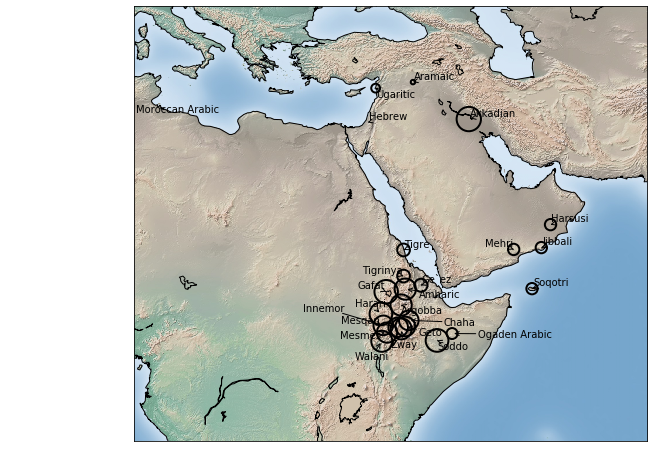

In [36]:
y = np.asarray(Told.lat.astype(float)).flatten().tolist()
x = np.asarray(Told.lon.astype(float)).flatten().tolist()
     
Order=np.asarray(Told.resolvedtree[:,-1]).astype(int).flatten()

y = [y[i] for i in Order]
x = [x[i] for i in Order]
        
name = np.asarray(Told.name).flatten().tolist()
vz = np.min(vals)
s = [80*n for n in vals-np.min(vals)]
    
myfig = plt.figure(figsize=(10, 8))
    
h = 3000
    
m = Basemap(llcrnrlon=8, llcrnrlat=-5,urcrnrlon=67,urcrnrlat=45, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='lightgray', zorder=0)
m.shadedrelief()
  
#m.scatter(x, y, s=s, c=s, cmap='Reds', linewidths=1, latlon=True)
m.scatter(x, y, s=s, edgecolors='black', linewidths=2, facecolors='none')

xpt, ypt = m(x, y)

texts = [plt.text(xpt[i], ypt[i], name[i], ha='center', va='top') for i in range(len(name))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

myfig.show()

In [37]:
np.round(Told.filledtimeFractions, 6), Told.name

(array([[0.036399, 0.055985, 0.140846, 0.278784, 0.132137,      nan,      nan,      nan,      nan,      nan, 0.051959],
        [0.036399, 0.055985, 0.140846, 0.278784, 0.132137, 0.073535,      nan,      nan,      nan,      nan, 0.282313],
        [0.036399, 0.055985, 0.140846, 0.278784, 0.132137, 0.073535,      nan,      nan,      nan,      nan, 0.282313],
        [0.036399, 0.055985, 0.140846, 0.278784, 0.148283, 0.133688, 0.058637,      nan,      nan,      nan, 0.147377],
        [0.036399, 0.055985, 0.140846, 0.278784, 0.148283, 0.133688, 0.058637,      nan,      nan,      nan, 0.147377],
        [0.036399, 0.055985, 0.140846, 0.278784, 0.148283, 0.133688,      nan,      nan,      nan,      nan, 0.206014],
        [0.036399, 0.055985, 0.140846, 0.278784, 0.148283, 0.030762, 0.038905, 0.110175,      nan,      nan, 0.15986 ],
        [0.036399, 0.055985, 0.140846, 0.278784, 0.148283, 0.030762, 0.038905, 0.110175,      nan,      nan, 0.15986 ],
        [0.036399, 0.055985, 0.140846, 0

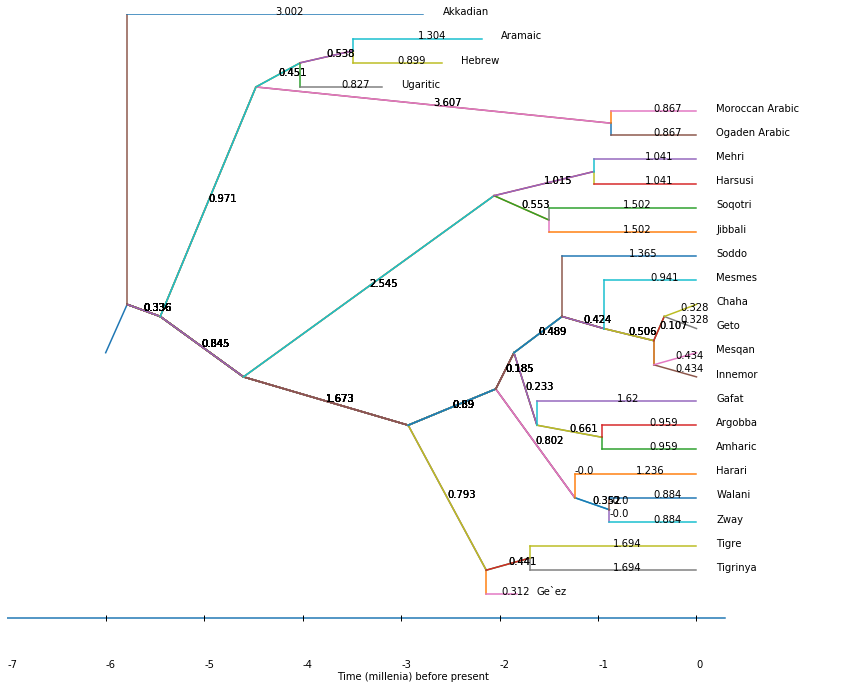

In [38]:
TFR = Told.depth*Told.filledtimeFractions
Tree = Told.resolvedtree.astype(int)
Num = np.matrix(np.arange(0, rows(Tree))).T
names = np.array(Told.name)

mildepth = np.nansum(TFR, axis=1).max().round().astype(int)
        
# Some place holders for translating the tree into data
            
minPos = J(rows(Tree), cols(Tree), np.nan)
maxPos = J(rows(Tree), cols(Tree), np.nan)
avePos = J(rows(Tree), cols(Tree), np.nan)
            
        # Roll through the tree and positions point and lines accordingly.
            
for i in range(0, cols(Tree)):
    m=ps(Tree, i)
    for j in range(0, rows(m)):
        bracketed = psm(Num, m, j)
        lowest = min(bracketed)
        highest = max(bracketed)
        minPos[m[j,0]:m[j,1]+1,i:i+1] = J(1 + m[j,1] - m[j,0], 1, lowest)
        maxPos[m[j,0]:m[j,1]+1,i:i+1] = J(1 + m[j,1] - m[j,0], 1, highest)
        average = np.mean(bracketed)
        avePos[m[j,0]:m[j,1]+1,i:i+1] = J(1 + m[j,1] - m[j,0], 1, average)

        # Block of code to to compile tree running sums. 
            
runningsum = np.copy(TFR[:,0:1])
for i in range(1,cols(TFR)):
    runningsum=np.hstack((runningsum, np.copy(np.matrix(np.nansum(TFR[:,:i+1],axis=1)).T)))
            
        # Reorganize the numbers so that the x-axis is the depth of the tree
            
depth = np.max(runningsum)
runningsum = runningsum - depth

        # Plot the root of the tree...

fig, ax = plt.subplots(figsize=(15, 12))
     
ax.plot([-depth,-depth + TFR[0,0]], [(rows(TFR) - 1)/2,(rows(TFR) - 1)/2 + 2])

dag = ax.axhline(y=1, xmin=0, xmax=mildepth/(mildepth + 1))
        
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])
        
text = []
for c in range(0, cols(TFR) - 1):
    for r in range(0, rows(Tree)):
        y = [avePos[r,c] + 2, avePos[r,c+1] + 2]
        x = [runningsum[r,c], runningsum[r,c+1]]
        ax.plot(x, y)
        
        if (x[1]-x[0]) != 0.0:
            #text1 = ax.text(np.mean(x), np.mean(y), np.round(x[1]-x[0],3))
            text.append(ax.text(np.mean(x), np.mean(y), np.round(x[1]-x[0],3)))
        ax.axis([-depth - 1,np.max(runningsum) + 1.5, -1, rows(Tree) + 1], yticks='none')
        
names = list(names)        
for n in range(0, len(names)):
    ax.annotate(names[n][0], xy = (runningsum[n,-1] + .2, n + 2)) 
          
for a in range(0, mildepth + 2):
    if a != 0:
        ax.annotate('-'+str(a), xy = (-a, -1))
    else:
        ax.annotate(str(a), xy= (a, -1))
            
        for a in range(0, mildepth + 1):
            ax.plot(-a, 1, '|', color='black')
            
        ax.set_xlabel('Time (millenia) before present        ')

### Akkadian 

If this were the point of origin, the maximum likelihood path is something like:

- Akkadian, Ogaden, Ge'ez, Mehri, Harari, Gafat, Soddo, Mesmes, Innemor, Chaha, Geto (11)
- Ogaden Arabic, Ugaridic, Hebrew, Aramaic (4)
- Ogaden Arabic, Moroccan Arabic (2) 
- Mehri, Jibbali, Soqotri (3)
- Mehri, Harsusi (2)
- Ge'ez, Tigre, Tigrinya (3)
- Harari, Walani, Zway (3)
- Gafat, Argobba, Amharic (3)
- Innemor, Mesqan (2)

Would require 11 separate migratory events. The likelihood of these events would be (time-normalized):

In [41]:
10*np.log(10)+3*np.log(3) + 4*(2*np.log(2)) + 3*(1*np.log(1))

31.866865240424353

# Ogaden Arabic

What about if the origin point were instead Ogaden Arabic? 

- Ogaden Arabic, Akkadian (2)
- Ogaden Arabic, Ge'ez, Mehri, Harari, Gafat, Soddo, Mesmes, Innemor, Chaha, Geto (10)
- Ogaden Arabic, Ugaritic, Hebrew, Aramaic (4)
- Mehri, Jibbali, Soqotri (3)
- Mehri, Harsusi (2)
- Ge'ez, Tigre, Tigrinya (3)
- Harari, Walani, Zway (3)
- Gafat, Argobba, Amharic (3)
- Innemor, Mesqan (2)
- Mehri, Harsusi (2)


In [45]:
9*np.log(9) + 3*np.log(3) + 4*(2*np.log(2)) + 4*(1*np.log(1))

28.616035506509867

# Ge'ez

What if Ge'ez were the point of origin? We would have:

- Ge'ez, Akkadian (2)
- Ge'ez, Ogaden Arabic, Ugaritic, Hebrew, Aramaic (5)
- Ogaden Arabic, Moroccan Arabic (2)
- Ge'ez, Mehri, Jibbali, Soqotri (4)
- Ge'ez, Harari, Gafat, Soddo, Mesmes, Innemor, Chaha, Geto (8)
- Harari, Walani, Zway (3)
- Gafat, Argobba, Amharic (3)
- Innemor, Mesqan (2)
- Mehri, Harsusi (2)
- Ge'ez, Tigre, Tigrinya (3)


In [46]:
7*np.log(7)+4*np.log(4)+3*np.log(3)+ 3*(2*np.log(2))

26.621268437230757

# Hebrew/Aramaic (equal odds)

If Hebrew were the point of origin, we have:

- Hebrew, Akkadian (2)
- Hebrew, Ge'ez (2)
- Hebrew, Ogaden Arabic (2)
- Hebrew, Ugaritic (2)
- Hebrew, Aramaic (2)
- Ogaden Arabic, Moroccan Arabic (2)
- Ge'ez, Mehri, Jibbali, Soqotri (4)
- Ge'ez, Harari, Gafat, Soddo, Mesmes, Innemor, Chaha, Geto (8) 
- Ge'ez, Tigre, Tigrinya (3)
- Harari, Walani, Zway (3)
- Gafat, Argobba, Amharic (3)
- Innemor, Mesqan (2)
- Mehri, Harsusi (2)

In [47]:
7*np.log(7) + 3*(2*np.log(2))+3*np.log(3)

21.076090992751194

In [48]:
np.exp(21)/(np.exp(21)+np.exp(28.61))

0.0004952264876891871

In [39]:
vals = np.unique(np.asarray(Tree[:, 0]))

In [40]:
A = np.zeros(shape=(len(vals), 2))

In [41]:
np.round(Told.D)

array([[   0.,  246.,  500.,  610.,  870.,  621.,  201.,  354.,  442.,  698.,  608.,  563.,  475.,  740.,  734.,
        1562., 1386., 1767., 1233.,  731., 5326., 2574., 2174., 2600., 2198.],
       [ 246.,    0.,  334.,  676.,  878.,  561.,  168.,  372.,  295.,  680.,  658.,  645.,  571.,  752.,  924.,
        1735., 1607., 1913., 1398.,  955., 5080., 2424., 2009., 2483., 2148.],
       [ 500.,  334.,    0., 1009., 1199.,  865.,  501.,  705.,  576.,  997.,  990.,  979.,  903., 1077., 1230.,
        1683., 1663., 1811., 1346., 1229., 4908., 2093., 1683., 2149., 1836.],
       [ 610.,  676., 1009.,    0.,  292.,  319.,  511.,  305.,  511.,  230.,   43.,   61.,  145.,  185.,  479.,
        2033., 1725., 2280., 1732.,  649., 5439., 3092., 2669., 3159., 2801.],
       [ 870.,  878., 1199.,  292.,    0.,  351.,  730.,  524.,  636.,  204.,  275.,  353.,  434.,  129.,  702.,
        2325., 2009., 2571., 2024.,  898., 5343., 3237., 2804., 3335., 3025.],
       [ 621.,  561.,  865.,  319.,  351

# Algorithm checking and repair:

In [42]:
    # Initialization
    distances = True
    usetimes  = True
    timescale = 1000
    distancescale = 1
    
    TM       = Told.resolvedtree                                           # Tree of matrix IDs
    bp       = Told.branchpositions                                        # positions of branches in matrix
    bp       = bp[rows(TM):]                                             # Terminal branches 
    branches = Told.filledtimeFractions*Told.depth*timescale                 # branch lengths
 
    LL       = np.zeros(rows(TM))                                        # Placeholder for log-likelihood
    LL_D     = np.zeros(rows(TM))                                        # Placeholde for distance-jump likelihood
    NN       = np.zeros(rows(TM))                                        # Placeholder for event counter
    TT       = branches[:, -1]                                           # Last column of branches
    DD       = np.zeros(rows(TM))
    Live     = np.zeros(rows(TM))
        
    D         = np.copy(Told.D) / distancescale
    np.fill_diagonal(D, 1)
    
    lnD = - np.log(D)                                                   # Proportional to log-likelihood/exponential jump
    
    if distances == False:
        lnD       = np.zeros(np.shape(lnD))
        
    afac = 1
    
    if usetimes == False:
        afac = 0

In [43]:
np.hstack((Told.resolvedtree, Told.name))

matrix([['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'Ge`ez'],
        ['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', 'Tigrinya'],
        ['0', '0', '0', '0', '0', '1', '2', '2', '2', '2', '2', 'Tigre'],
        ['0', '0', '0', '0', '1', '2', '3', '3', '3', '3', '3', 'Zway'],
        ['0', '0', '0', '0', '1', '2', '3', '4', '4', '4', '4', 'Walani'],
        ['0', '0', '0', '0', '1', '2', '4', '5', '5', '5', '5', 'Harari'],
        ['0', '0', '0', '0', '1', '3', '5', '6', '6', '6', '6', 'Amharic'],
        ['0', '0', '0', '0', '1', '3', '5', '6', '7', '7', '7', 'Argobba'],
        ['0', '0', '0', '0', '1', '3', '5', '7', '8', '8', '8', 'Gafat'],
        ['0', '0', '0', '0', '1', '3', '6', '8', '9', '9', '9', 'Innemor'],
        ['0', '0', '0', '0', '1', '3', '6', '8', '9', '9', '10', 'Mesqan'],
        ['0', '0', '0', '0', '1', '3', '6', '8', '9', '10', '11', 'Geto'],
        ['0', '0', '0', '0', '1', '3', '6', '8', '9', '10', '12', 'Chaha'],
        ['0', '0', '0',

# Loop running for each (interior branch)

In [49]:
bb = bp[0, :]
print(bb+1, len(bp))

[11 10] 24


Beginning of an iteration...

In [51]:
    #for bb in bp:
    r, c    = bb[0], bb[1]                           #gets row and column
    id      = TM[r, c]                               #gets the id corresponding to the branch 
    tu      = np.where(TM[:, c] == id)[0]            #tu gets the group of societies at this point...note that this will
                                                     #pick out the actual positions in the matrix...
    bhat    = branches[tu, c]                        #gets the branches that match the id...need filled time fractions
    THat    = TM[tu, c:]                             #gets the entire continuing subtree
    NNCount = NN[tu] + 1                             # computes whatever current branch is plus one
    TTCount = TT[tu] + bhat                          # computes the current time total and ads the new branch
    LLHat   = LL[tu]                                 # gets the current likelihood...This might play a role

In [54]:
    for p in tu:                                     # pushes trees to likelihood, adds jump distance if necessary.
        if Live[p] == 1:
            LL[p]   = LL[p] + NN[p] * (np.log(NN[p]) - np.log(TT[p]))
            LL_D[p] = LL_D[p] + DD[p]
    
    LL_DHat = LL_D[tu]
     
    DHat    = (lnD[tu, :])[:, tu]                  # localized jump matrix

In [55]:
    z = 0                                          # This little block of code pushes forward through the subtree to find
    while True:                                    # where the split occurs.
        ids  = uniq(THat[:, z])                    # This finds the very first split, and the "ids" variable then
        nums = THat[:, z]                          # contains these unique ids. For terminal branches, these are all the same
        z    = z + 1                               # note what nums is here...it is all of the rows of the subtree where
        if len(ids) > 1:                           # the split has occurred
            break
                
    zz = 1                                         # zz by contrast is the next level up and it should contain MORE than
    while True:                                    # two groups if it is to be useful. This is because with a split of >2
        ids2 = uniq(THat[:, zz])                   # we will have to do get informtaion on the road not chosen...
        numss = THat[:, zz]
        zz = zz + 1 
        if len(ids2) >2 or zz == np.shape(THat)[1]:
            break


In [62]:
numss

matrix([[ 9],
        [10]])

In [60]:
    TTHat = np.zeros(len(nums))                    # couldn't this be the same as the rows of TTCount?
    NNHat = np.zeros(len(nums))
    DDHat = np.zeros(len(nums))      

In [63]:
TTHat

array([0., 0.])

In [66]:
m = ids[0]
posi = np.where(nums == m)[0]
posni = np.where(nums != m)[0]


array([0], dtype=int64)

In [59]:
    for m in ids:
        posi  = np.where(nums == m)[0]
        posni = np.where(nums != m)[0]
        for q in posi:
            maxFinder = NNCount[posni]*(np.log(NNCount[posni]) \
                      - np.log(TTCount[posni])) + LL_DHat[posni] + DHat[q, posni] + LLHat[posni]
            maxm      = np.argmax(maxFinder)
            TTHat[q]  = toAdd[maxm]
            NNHat[q]  = NNCount[posni[maxm]]
            DDHat[q]  = DHat[q, posni[maxm]] + LL_DHat[posni[maxm]]

array([ 9, 10])

In [476]:
    #for bb in bp:
    r, c    = bb[0], bb[1]                           #gets row and column
    id      = TM[r, c]                               #gets the id corresponding to the branch 
    tu      = np.where(TM[:, c] == id)[0]            #tu gets the group of societies at this point
    bhat    = branches[tu, c]                        #gets the branches that match the id
    THat    = TM[tu, c:]                             #gets the entire continuing subtree
    NNCount = NN[tu] + 1                             # computes whatever current branch is plus one
    TTCount = TT[tu] + bhat                          # computes the current time total and ads the new branch
    LLHat   = LL[tu]                                 # gets the current likelihood...This might play a role

    for p in tu:                                     # pushes trees to likelihood, adds jump distance if necessary.
        if Live[p] == 1:
            LL[p]   = LL[p] + NN[p] * (np.log(NN[p]) - np.log(TT[p]))
            LL_D[p] = LL_D[p] + DD[p]
    
    LL_DHat = LL_D[tu]
     
    DHat    = (lnD[tu, :])[:, tu]                  # localized jump matrix
    
    z = 0                                          # This little block of code pushes forward through the subtree to find
    while True:                                    # where the split occurs.
        ids  = uniq(THat[:, z])
        nums = THat[:, z]
        z    = z + 1
        if len(ids) > 1:
            break
                
    zz = 1
    while True:
        ids2 = uniq(THat[:, zz])
        numss = THat[:, zz]
        zz = zz + 1 
        if len(ids2) >2 or zz == np.shape(THat)[1]:
            break
                
    TTHat = np.zeros(len(nums))
    NNHat = np.zeros(len(nums))
    DDHat = np.zeros(len(nums))  
    
    for m in ids:
        posi  = np.where(nums == m)[0]
        posni = np.where(nums != m)[0]
        for q in posi:
            maxFinder = NNCount[posni]*(np.log(NNCount[posni]) \
                      - np.log(TTCount[posni])) + LL_DHat[posni] + DHat[q, posni] + LLHat[posni]
            maxm      = np.argmax(maxFinder)
            TTHat[q]  = toAdd[maxm]
            NNHat[q]  = NNCount[posni[maxm]]
            DDHat[q]  = DHat[q, posni[maxm]] + LL_DHat[posni[maxm]]

Now, we have the following...

This little bit of code figures out where each location is going optimally. Note calculations using NNCount and TTCount - which adds on the incremented-by-one Tree...while the maxFinder considers LLHat, it should also add it on eventually! So, the idea would be...whatever branch is being taken that's fine...but we then need to get the smallest likelihood of any tree not on that branch and add it...

In [451]:
posi = np.where(nums == m)[0]
posni = np.where(nums != m)[0]

In [452]:
maxFinder

array([-23.39287671, -22.67260275])

In [453]:
        for m in ids:
            posi   = np.where(nums == m)[0]
            posni  = np.where(nums != m)[0]
            toAdd  = TTCount[posni]
            for q in posi:
                maxFinder = NNCount[posni]*(np.log(NNCount[posni]) \
                    - np.log(toAdd)) + LL_DHat[posni] + DHat[q, posni] + LLHat[posni]
                maxm      = np.argmax(maxFinder)
                TTHat[q]  = toAdd[maxm]
                NNHat[q]  = NNCount[posni[maxm]]
                DDHat[q]  = DHat[q, posni[maxm]] + LL_DHat[posni[maxm]]
                
                

Now, we have the next block of code...

In [454]:
        for p in range(0, rows(tu)):
            TT[tu[p]] = TTHat[p]
            NN[tu[p]] = NNHat[p]
            DD[tu[p]] = DDHat[p]
            if Live[tu[p]] == 0:
                Live[tu[p]] = 1

So, these four blocks comprise our code...let's make an iterator over these, so we can see what the current state of the algorithm is...I suspect that we should be adding in LLHat...

In [455]:
NN

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [456]:
Live

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [457]:
DD

array([  0.        ,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,  -5.34784821,  -5.34784821,
         0.        , -10.1241366 ,  -9.00121981,  -9.75313309, -10.31929356,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ,
         0.        ])

In [458]:
TT

array([ 432.54098514, 1734.68940377, 1734.68940377,  849.91584396,  849.91584396, 1186.59453075, 1566.74243098,
       1566.74243098, 1566.74243098,  962.75770029,  962.75770029,  962.75770029,  962.75770029,  962.75770029,
       1413.61356508, 1479.0596307 , 1479.0596307 , 1040.01419324, 1040.01419324,  833.66294313,  833.66294313,
        851.7669756 ,  911.13053082, 1246.60802895, 2914.81034713])

In [459]:
LL

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -6.86980177, -6.86980177, -6.86980177, -6.86980177,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [460]:
LL_D

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -5.2453596 , -5.2453596 , -4.49344631, -4.49344631,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])